# Exploration phase (**optional**)

In this exploration phase we will visualize some features of your dataset to help you make more informed decisitions in case you want to **adapt the default parameters** to your dataset.

You can always skip this part and go with the default parameters but if you want to have a classifier as efficient as possible you should consider spending five minutes running this analysis.

In [39]:
import os

import matplotlib.pyplot as plt # ignacio used .pylab
import numpy as np
import pandas as pd
from tqdm import tqdm

import imgclas
from imgclas import paths, config
from imgclas.data_utils import load_image, load_data_splits, augment


CONF = config.get_conf_dict()

# Customize your image folder if needed
# CONF['general']['images_directory'] = '/media/ignacio/Datos/datasets/semillas/datasets'  # absolute path to image_folder

splits_dir = paths.get_splits_dir()

# Load the training data
X_train, y_train = load_data_splits(splits_dir=splits_dir,
                                    im_dir=CONF['general']['images_directory'],
                                    split_name='train')

# Load the validation data
if (CONF['training']['use_validation']) and ('val.txt' in os.listdir(splits_dir)):
    X_val, y_val = load_data_splits(splits_dir=splits_dir,
                                    im_dir=CONF['general']['images_directory'],
                                    split_name='val')
else:
    print('No validation data.')
    X_val, y_val = None, None
    CONF['training']['use_validation'] = False
    
# Load the test data
X_test, y_test = load_data_splits(splits_dir=splits_dir,
                                    im_dir=CONF['general']['images_directory'],
                                    split_name='test')

Loading train data...
Loading val data...
Loading test data...


## 1.1 Distribution of parameters

Visualize whether the sets are well balanced regarding different params: background, plane, angle and reference (coin).

In [40]:
# extract values of angle, plane, glass, coin and background in train images
angles=[]
planes=[]
back=[]
vol=[]
# glass=[]
ref=[]
for file in X_train:
    l=file.split('_')
    planes.append(l[-2])
    angles.append(l[-1].split('.')[0])
    back.append(l[-4])
    vol.append(int(l[4]))
    ref.append(l[-3])
#     glass.append(l[3])

df_train = pd.DataFrame(list(zip(list(X_train), vol, back, ref, planes, angles)),
               columns =['image_path', 'volume', 'background', 'ref', 'plane', 'angle'])

In [41]:
# extract values of angle, plane, glass, coin and background in val images
angles=[]
planes=[]
back=[]
vol=[]
# glass=[]
ref=[]
for file in X_val:
    l=file.split('_')
    planes.append(l[-2])
    angles.append(l[-1].split('.')[0])
    back.append(l[-4])
    vol.append(int(l[4]))
    ref.append(l[-3])
#     glass.append(l[3])

df_val = pd.DataFrame(list(zip(list(X_train), vol, back, ref, planes, angles)),
               columns =['image_path', 'volume', 'background', 'ref', 'plane', 'angle'])

In [42]:
# extract values of angle, plane, glass, coin and background in val images
angles=[]
planes=[]
back=[]
vol=[]
# glass=[]
ref=[]
for file in X_test:
    l=file.split('_')
    planes.append(l[-2])
    angles.append(l[-1].split('.')[0])
    back.append(l[-4])
    vol.append(int(l[4]))
    ref.append(l[-3])
#     glass.append(l[3])

df_test = pd.DataFrame(list(zip(list(X_train), vol, back, ref, planes, angles)),
               columns =['image_path', 'volume', 'background', 'ref', 'plane', 'angle'])

Revisión de imágenes mal etiquetadas:

In [5]:
wrong_labelled=[]
for index, row in df_train.iterrows():
    if not row['background'] in ['az', 'bl', 'nd']:
        wrong_labelled.append(row['image_path'])
        print(row['image_path'])

In [24]:
# with open('/srv/images_classes/wrong_labelled_CopasAll.csv','w') as file:
for index, row in df_train.iterrows():
    if not row['angle'] in ['sup', 'sup1', 'cen', 'inf']:
        wrong_labelled.append(row['image_path'])
        print(row['image_path'])
#             file.write(str(row['image_path']))
#             file.write('\n')

Representación de las estadísticas de los principales parámetros por imagen.

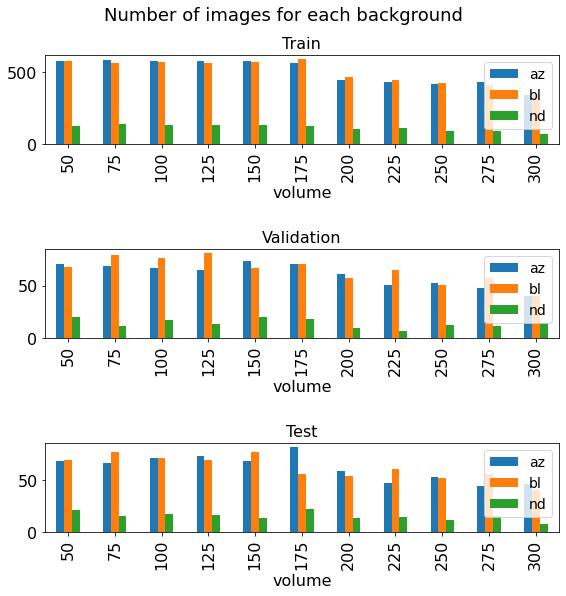

In [43]:
import matplotlib.pyplot as plt

parameters = {'axes.labelsize': 16,
          'axes.titlesize': 16,
        'xtick.labelsize':16,
        'ytick.labelsize':16,
        'legend.fontsize':14}
plt.rcParams.update(parameters)

#define number of rows and columns for subplots
fig, axes = plt.subplots(nrows=3,ncols=1, figsize=(8.5,8.5))

df_backs_train=df_train.groupby(['volume', 'background']).size().reset_index(name='counts')
df_backs_train.pivot(index='volume', columns='background', 
                     values='counts').fillna(0).plot(kind='bar', stacked=False, ax=axes[0]).legend(loc='upper right')
axes[0].title.set_text('Train')

df_backs_val=df_val.groupby(['volume', 'background']).size().reset_index(name='counts')
df_backs_val.pivot(index='volume', columns='background', 
                   values='counts').fillna(0).plot(kind='bar', stacked=False, ax=axes[1]).legend(loc='upper right')
axes[1].title.set_text('Validation')

df_backs_test=df_test.groupby(['volume', 'background']).size().reset_index(name='counts')
df_backs_test.pivot(index='volume', columns='background', 
                     values='counts').fillna(0).plot(kind='bar', stacked=False, ax=axes[2]).legend(loc='upper right')
axes[2].title.set_text('Test')

fig.tight_layout(pad=3.0)
plt.suptitle('Number of images for each background', y=1, fontsize=18)
plt.show()

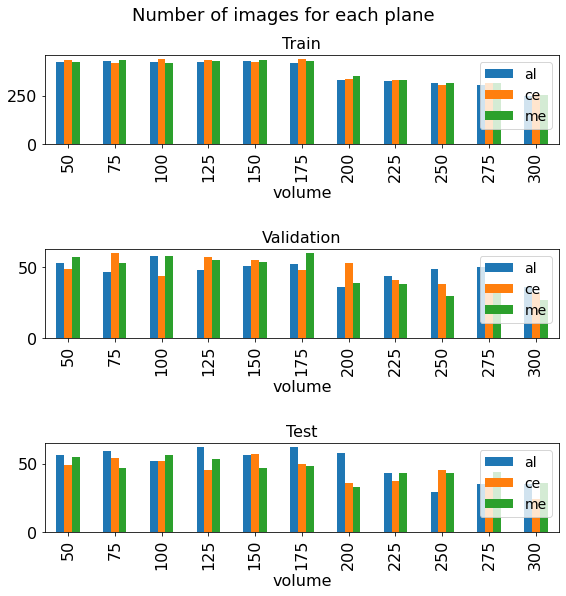

In [44]:
#define number of rows and columns for subplots
fig, axes = plt.subplots(nrows=3,ncols=1, figsize=(8.5,8.5))

df_planes_train=df_train.groupby(['volume', 'plane']).size().reset_index(name='counts')
df_planes_train.pivot(index='volume', columns='plane', 
                     values='counts').fillna(0).plot(kind='bar', stacked=False, ax=axes[0]).legend(loc='upper right')
axes[0].title.set_text('Train')

df_planes_val=df_val.groupby(['volume', 'plane']).size().reset_index(name='counts')
df_planes_val.pivot(index='volume', columns='plane', 
                   values='counts').fillna(0).plot(kind='bar', stacked=False, ax=axes[1]).legend(loc='upper right')
axes[1].title.set_text('Validation')

df_planes_test=df_test.groupby(['volume', 'plane']).size().reset_index(name='counts')
df_planes_test.pivot(index='volume', columns='plane', 
                     values='counts').fillna(0).plot(kind='bar', stacked=False, ax=axes[2]).legend(loc='upper right')
axes[2].title.set_text('Test')

fig.tight_layout(pad=3.0)
plt.suptitle('Number of images for each plane', y=1, fontsize=18)
plt.show()

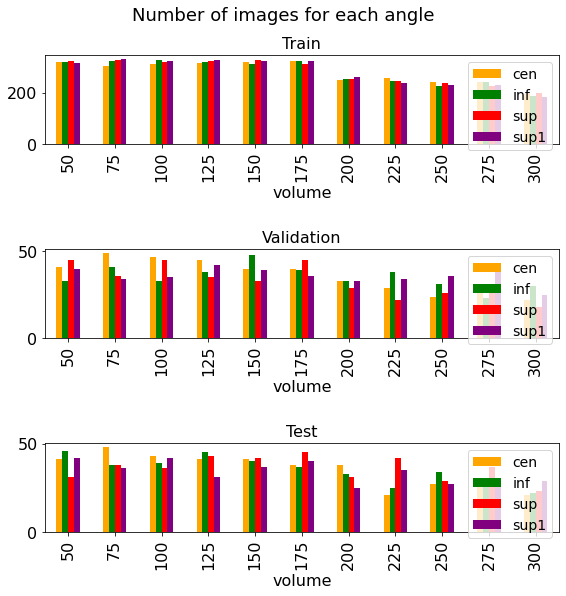

In [45]:
#define number of rows and columns for subplots
fig, axes = plt.subplots(nrows=3,ncols=1, figsize=(8.5,8.5))

df_angles_train=df_train.groupby(['volume', 'angle']).size().reset_index(name='counts')
df_angles_train.pivot(index='volume', columns='angle', 
                     values='counts').fillna(0).plot(kind='bar', stacked=False, 
                                                     color=['orange', 'green', 'red', 'purple'],
                                                     ax=axes[0]).legend(loc='upper right')
axes[0].title.set_text('Train')

df_angles_val=df_val.groupby(['volume', 'angle']).size().reset_index(name='counts')
df_angles_val.pivot(index='volume', columns='angle', 
                   values='counts').fillna(0).plot(kind='bar', stacked=False, 
                                                   color=['orange', 'green', 'red', 'purple'], 
                                                   ax=axes[1]).legend(loc='upper right')
axes[1].title.set_text('Validation')

df_angles_test=df_test.groupby(['volume', 'angle']).size().reset_index(name='counts')
df_angles_test.pivot(index='volume', columns='angle', 
                     values='counts').fillna(0).plot(kind='bar', stacked=False,
                                                     color=['orange', 'green', 'red', 'purple'], 
                                                     ax=axes[2]).legend(loc='upper right')
axes[2].title.set_text('Test')

fig.tight_layout(pad=3.0)
plt.suptitle('Number of images for each angle', y=1, fontsize=18)
plt.show()

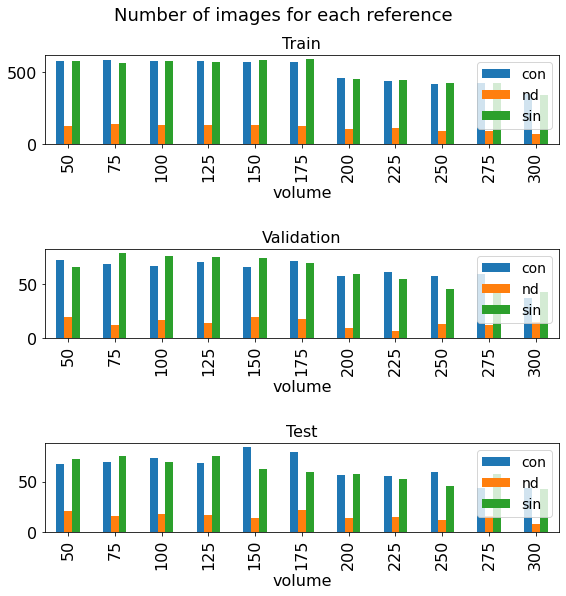

In [46]:
#define number of rows and columns for subplots
fig, axes = plt.subplots(nrows=3,ncols=1, figsize=(8.5,8.5))

df_ref_train=df_train.groupby(['volume', 'ref']).size().reset_index(name='counts')
df_ref_train.pivot(index='volume', columns='ref', 
                     values='counts').fillna(0).plot(kind='bar', stacked=False, ax=axes[0]).legend(loc='upper right')
axes[0].title.set_text('Train')

df_ref_val=df_val.groupby(['volume', 'ref']).size().reset_index(name='counts')
df_ref_val.pivot(index='volume', columns='ref', 
                   values='counts').fillna(0).plot(kind='bar', stacked=False, ax=axes[1]).legend(loc='upper right')
axes[1].title.set_text('Validation')

df_ref_test=df_test.groupby(['volume', 'ref']).size().reset_index(name='counts')
df_ref_test.pivot(index='volume', columns='ref', 
                     values='counts').fillna(0).plot(kind='bar', stacked=False, ax=axes[2]).legend(loc='upper right')
axes[2].title.set_text('Test')

fig.tight_layout(pad=3.0)
plt.suptitle('Number of images for each reference', y=1, fontsize=18)
plt.show()

Load all the data (before train, val and test splits) to check if there is any error.

In [18]:
# splits_dir = paths.get_splits_dir()
splits_dir = '/srv/images_classes/Regression/copas_Madrid_LaRioja'

# Load the data
data = pd.read_csv(splits_dir+'/copasAll.txt', sep="*", header=None, names=['image', 'clase'])

In [19]:
X=pd.Series(data.image)
y=pd.Series(data.clase)

In [20]:
# extract values of angle, plane, glass, coin and background in train images
angles=[]
planes=[]
back=[]
vol=[]
# glass=[]
ref=[]
for file in X:
    l=file.split('_')
    planes.append(l[-2])
    angles.append(l[-1].split('.')[0])
    back.append(l[-4])
    vol.append(int(l[4]))
    ref.append(l[-3])
#     glass.append(l[3])

df = pd.DataFrame(list(zip(list(X), vol, back, ref, planes, angles)),
               columns =['image_path', 'volume', 'background', 'ref', 'plane', 'angle'])

In [21]:
wrong_labelled=[]
for index, row in df.iterrows():
    if not row['background'] in ['az', 'bl', 'nd']:
        wrong_labelled.append(row['image_path'])
        print(row['image_path'])

/srv/datos/Laboratorio/La Rioja/ICVV/Copa Chardonnay/Est_Rio_R_Char_250_nd_f_az_sin_me__sup1.jpg


In [22]:
for index, row in df.iterrows():
    if not row['angle'] in ['sup', 'sup1', 'cen', 'inf']:
        wrong_labelled.append(row['image_path'])
        print(row['image_path'])

In [29]:
for index, row in df.iterrows():
    if not row['background'] in ['bl', 'az', 'nd']:
        wrong_labelled.append(row['image_path'])
        print(row['background'])
        print(row['image_path'])
        print(index)

sin
/srv/datos/Laboratorio/La Rioja/ICVV/Copa Chardonnay/Est_Rio_R_Char_250_nd_f_az_sin_me__sup1.jpg
4351


In [30]:
df.loc[[4351]]

,image_path,volume,background,ref,plane,angle
4351,/srv/datos/Laboratorio/La Rioja/ICVV/Copa Char...,250,sin,me,,sup1
